In [159]:
import numpy as np
import matplotlib.pyplot as plt
from Layers import *
from Models import *
np.random.seed(42)
data = np.load('./data/mnist_data.npy')
data /= 255
labels = np.load('./data/mnist_labels.npy')


# 指定した番号のみの学習
numbers = [1]
filter_indices = np.isin(labels, numbers)
data = data[filter_indices]
labels = labels[filter_indices]

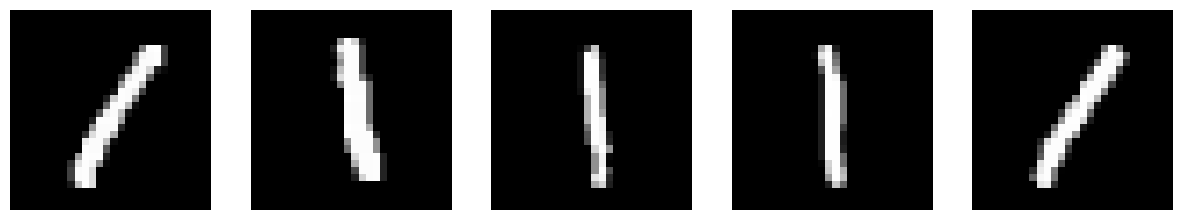

In [160]:
# 最初の5枚の画像を一行に表示
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(data[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')  # 軸を非表示にする

plt.show()

In [138]:
"""def resize_images(images, new_size):
    new_height, new_width = new_size
    old_height, old_width = images.shape[1], images.shape[2]
    scale_h, scale_w = old_height // new_height, old_width // new_width

    resized_images = np.zeros((images.shape[0], new_height, new_width))

    for i in range(images.shape[0]):
        for y in range(new_height):
            for x in range(new_width):
                start_y, start_x = y * scale_h, x * scale_w
                end_y, end_x = start_y + scale_h, start_x + scale_w
                resized_images[i, y, x] = np.mean(images[i, start_y:end_y, start_x:end_x])

    return resized_images

data = data.reshape(data.shape[0], 28, 28)
data = resize_images(data, (14, 14))
data = data.reshape(data.shape[0], -1)
data.shape"""

(7877, 196)

In [161]:
"""z_dim = 128
class Generator(Model):
    def __init__(self):
        self.layers = [
            Linear(z_dim, 256),
            ReLU(),
            BatchNorm(256),

            Linear(256, 512),
            ReLU(),
            BatchNorm(512),

            Linear(512, 1024),
            ReLU(),
            BatchNorm(1024),

            Linear(1024, 28*28),
            Tanh()
        ]

class Discriminator(Model):
    def __init__(self):
        self.layers = [
            Linear(28*28, 512),
            ReLU(),
            BatchNorm(512),

            Linear(512, 256),
            ReLU(),
            BatchNorm(256),

            Linear(256, 128),
            ReLU(),
            BatchNorm(128),

            Linear(128, 64),
            ReLU(),

            Linear(64, 1),
            Sigmoid()
        ]"""

In [ ]:
z_dim = 128
class Generator(Model):
    def __init__(self):
        self.layers = [
            Linear(z_dim, 256),
            ReLU(),
            BatchNorm(256),

            Linear(256, 512),
            ReLU(),
            BatchNorm(512),

            Linear(512, 1024),
            ReLU(),
            BatchNorm(1024),

            Linear(1024, 28*28),
            Tanh()
        ]

class Discriminator(Model):
    def __init__(self):
        self.layers = [
            Linear(28*28, 512),
            ReLU(),
            BatchNorm(512),

            Linear(256, 128),
            ReLU(),
            BatchNorm(128),

            Linear(128, 64),
            ReLU(),

            Linear(64, 1),
            Sigmoid()
        ]

In [177]:
# GANのトレーニング
generator = Generator()
discriminator = Discriminator()

batch_size = 16
losses_g = []
losses_d = []

ε = 1e-8
s = len(data) // batch_size
def train_D(n):
    for k in range(n*s):
        noise = np.random.randn(batch_size, z_dim)
        generated_data = generator.forward(noise)
        
        # 本物のデータ
        real_data = data[np.random.randint(0, data.shape[0], size=batch_size)]
        
        # Discriminatorのトレーニング
        real_output = discriminator.forward(real_data)
        generated_output = discriminator.forward(generated_data)
        
        # 損失の計算
        loss_d_real = -np.log(real_output + ε)
        loss_d_generated = -np.log(1 - generated_output + ε)
        loss_d = np.mean(loss_d_real) + np.mean(loss_d_generated)
        
        # 勾配の計算
        grad_d_real = -1 / (real_output + ε)
        grad_d_generated = 1 / (1 - generated_output + ε)
        
        discriminator.backward(grad_d_real, lr_D)
        discriminator.backward(grad_d_generated, lr_D)
        mean_loss_d = np.mean(loss_d)
        losses_d.append(mean_loss_d)

        print(f"k: {k+1}/{n*s}, D_loss: {mean_loss_d:.7f}, lr_D: {lr_D}")


def train_G(n):
    for k in range(n*s):
        # Generatorのトレーニング
        noise = np.random.randn(batch_size, z_dim)
        generated_data = generator.forward(noise)
        generated_output = discriminator.forward(generated_data)
        
        # 損失の計算
        loss_g = -np.log(generated_output + ε)
        
        # 勾配の計算
        grad_g = -1 / (generated_output + ε)
        
        discriminator.backward(grad_g, lr_D)
        generator.backward(grad_g, lr_G)
        mean_loss_g = np.mean(loss_g)
        losses_g.append(mean_loss_g)

        print(f"k: {k+1}/{n*s}, G_loss: {mean_loss_g:.7f}, lr_G: {lr_G}")

lr_D = 0.1
lr_G = 0.00001
for i in range(1, 10):
    lr_D*=0.5
    lr_G*=0.5
    train_D(1)
    train_G(1)

k: 1/492, D_loss: 1.3860704, lr_D: 0.05
k: 2/492, D_loss: 1.3870265, lr_D: 0.05
k: 3/492, D_loss: 1.3872914, lr_D: 0.05
k: 4/492, D_loss: 1.3868550, lr_D: 0.05
k: 5/492, D_loss: 1.3861994, lr_D: 0.05
k: 6/492, D_loss: 1.3857813, lr_D: 0.05
k: 7/492, D_loss: 1.3864954, lr_D: 0.05
k: 8/492, D_loss: 1.3862872, lr_D: 0.05
k: 9/492, D_loss: 1.3860174, lr_D: 0.05
k: 10/492, D_loss: 1.3862399, lr_D: 0.05
k: 11/492, D_loss: 1.3866230, lr_D: 0.05
k: 12/492, D_loss: 1.3864136, lr_D: 0.05
k: 13/492, D_loss: 1.3866062, lr_D: 0.05
k: 14/492, D_loss: 1.3867110, lr_D: 0.05
k: 15/492, D_loss: 1.3863184, lr_D: 0.05
k: 16/492, D_loss: 1.3867636, lr_D: 0.05
k: 17/492, D_loss: 1.3867819, lr_D: 0.05
k: 18/492, D_loss: 1.3868889, lr_D: 0.05
k: 19/492, D_loss: 1.3860259, lr_D: 0.05
k: 20/492, D_loss: 1.3867543, lr_D: 0.05
k: 21/492, D_loss: 1.3865289, lr_D: 0.05
k: 22/492, D_loss: 1.3864296, lr_D: 0.05
k: 23/492, D_loss: 1.3864227, lr_D: 0.05
k: 24/492, D_loss: 1.3858923, lr_D: 0.05
k: 25/492, D_loss: 1.3870

In [ ]:
"""# GANのトレーニング
generator = Generator()
discriminator = Discriminator()

epochs = 300
batch_size = 16
lr_G = 0.000005
lr_D = 0.001

losses_g = []
losses_d = []

for epoch in range(epochs):
    for _ in range(batch_size):
        # ノイズから生成されたデータを生成
        for k in range(1):
            noise = np.random.randn(batch_size, z_dim)
            generated_data = generator.forward(noise)
            
            # 本物のデータ
            real_data = data[np.random.randint(0, data.shape[0], size=batch_size)]
            
            # Discriminatorのトレーニング
            real_output = discriminator.forward(real_data)
            generated_output = discriminator.forward(generated_data)
            
            # 損失の計算
            loss_d_real = -np.log(real_output + ε)
            loss_d_generated = -np.log(1 - generated_output + ε)
            loss_d = np.mean(loss_d_real) + np.mean(loss_d_generated)
            
            # 勾配の計算
            grad_d_real = -1 / (real_output + ε)
            grad_d_generated = 1 / (1 - generated_output + ε)
            
            discriminator.backward(grad_d_real, lr_D)
            discriminator.backward(grad_d_generated, lr_D)
        
        for k in range(5):
            # Generatorのトレーニング
            noise = np.random.randn(batch_size, z_dim)
            generated_data = generator.forward(noise)
            generated_output = discriminator.forward(generated_data)
            
            # 損失の計算
            loss_g = -np.log(generated_output + ε)
            
            # 勾配の計算
            grad_g = -1 / (generated_output + ε)
            
            discriminator.backward(grad_g, lr_D)
            generator.backward(grad_g, lr_G)
        
        mean_loss_d = np.mean(loss_d)
        mean_loss_g = np.mean(loss_g)

        # 損失の記録
        
        losses_d.append(mean_loss_d)
        losses_g.append(mean_loss_g)
    
    if (epoch + 1) % 1 == 0:
        print(f"Epoch {epoch+1}/{epochs}, D_loss: {mean_loss_d:.7f}, G_loss: {mean_loss_g:.7f}")
"""

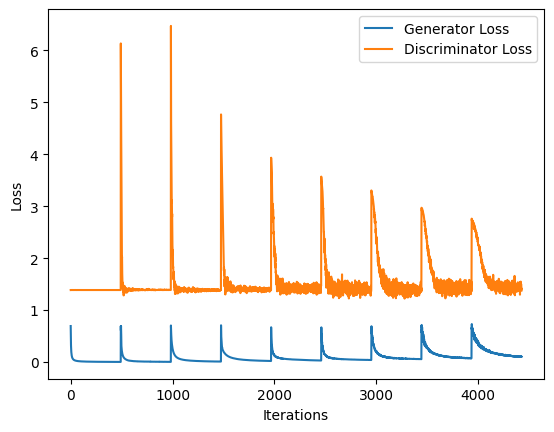

In [178]:
# 損失の可視化
import matplotlib.pyplot as plt

plt.plot(losses_g, label='Generator Loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

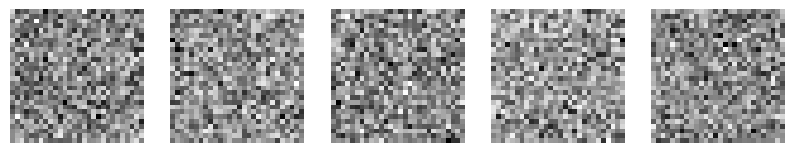

In [179]:
def generate_and_display_images(generator, num_images):
    noise = np.random.randn(num_images, z_dim)  # ノイズを生成
    generated_images = generator.forward(noise)  # Generatorで画像を生成
    
    # 画像を表示
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# 使用例
generate_and_display_images(generator, 5)  # 5枚の画像を生成して表示
